In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataframe = load_dataset('lukebarousse/data_jobs')

df = dataframe['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

import ast

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\gnikh\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Jan 25 12:41:59 2025).


In [2]:
df_exploded = df.explode('job_skills').copy()

In [10]:
df_clean = df_exploded.groupby(['job_skills', 'job_title_short']).size()

data = df_clean.reset_index(name='skill_count')

data.sort_values(by='skill_count', ascending=False, inplace=True)

data_total = df['job_title_short'].value_counts().reset_index(name='Total')

data_merge = pd.merge(data, data_total, how='left', on='job_title_short')

data_merge['percent'] = data_merge['skill_count'] / data_merge['Total'] * 100

data_merge

,job_skills,job_title_short,skill_count,Total,percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,mattermost,Data Scientist,1,172286,0.000580
2253,clickup,Machine Learning Engineer,1,14080,0.007102
2254,heroku,Senior Data Analyst,1,29216,0.003423


In [5]:
job_list = ['Data Analyst', 'Data Engineer', 'Data Scientist']

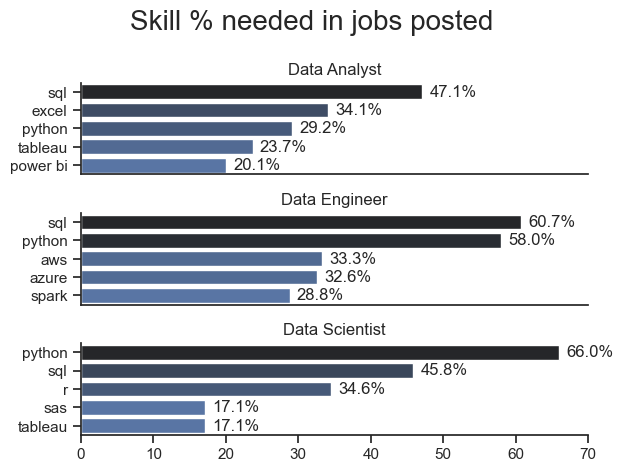

In [42]:
fig, ax = plt.subplots(3,1)
import seaborn as sns

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_list):
    ploting = data_merge[data_merge['job_title_short'] == job_title].head(5)
    sns.barplot(ploting, x='percent', y='job_skills', ax=ax[i], hue='percent', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,70)
    ax[i].set_xlabel('')

    for n, v in enumerate(ploting['percent']):
        ax[i].text(v + 1, n, f'{v:.1f}%', va='center')

    ax[0].set_xticks([])
    ax[1].set_xticks([])

sns.despine()
fig.suptitle('Skill % needed in jobs posted', fontsize=20)
fig.tight_layout()